In [1]:
#if not install
pip install numpy
pip install pandas
pip install sklearn
pip install xgboost
pip install catboost

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from catboost import  CatBoostClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [22]:
#dark mode for plots
import matplotlib.pyplot as plt  
plt.style.use('dark_background')

For Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls drive/MyDrive/DS/Data/Fight_historical_data_UFC_1993_2021/
data = pd.read_csv('drive/MyDrive/DS/Data/Fight_historical_data_UFC_1993_2021/data.csv')
data.head()

In [ ]:
!ls drive/MyDrive/DS/Data/Fight_historical_data_UFC_1993_2021/

data.csv	       raw_fighter_details.csv
preprocessed_data.csv  raw_total_fight_data.csv


In [ ]:
data = pd.read_csv('drive/MyDrive/DS/Data/Fight_historical_data_UFC_1993_2021/data.csv')
data.head()

For locall 

In [5]:
data = pd.read_csv('data/data.csv')
data.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,...,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,...,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,...,1,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,...,0,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0
4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125,0.0,...,1,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0


In [6]:
pr_data = pd.read_csv('data/preprocessed_data.csv')
pr_data.head()

,Winner,title_bout,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,...,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Sideways,R_Stance_Southpaw,R_Stance_Switch
0,Red,False,0.000000,0.0,0.420000,0.49500,0.330,0.36000,0.500000,1.000000,...,0,1,0,0,0,0,1,0,0,0
1,Red,False,0.500000,0.0,0.660000,0.30500,0.300,0.50000,1.500000,0.000000,...,0,1,0,0,0,0,1,0,0,0
2,Red,False,0.015625,0.0,0.450000,0.42750,0.250,0.20000,0.148468,0.098389,...,0,1,0,0,0,0,0,0,1,0
3,Blue,False,0.015625,0.0,0.450000,0.42750,0.250,0.20000,0.148468,0.098389,...,0,0,0,1,0,0,0,0,0,1
4,Blue,False,0.125000,0.0,0.535625,0.57875,0.185,0.16625,0.125000,0.187500,...,0,1,0,0,0,0,1,0,0,0


In [7]:
data.describe()

,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,...,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
count,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.00000,4585.000000,...,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,6008.000000,5606.000000,6010.000000,5840.000000,5949.000000
mean,0.247476,0.176818,0.453310,0.434290,0.292650,0.268742,0.478884,0.409276,0.15673,0.141306,...,0.306886,1.251331,1.297572,0.796241,0.069195,178.991788,183.562347,170.686356,29.293151,29.598252
std,0.378509,0.324633,0.130458,0.132618,0.273628,0.267178,0.724229,0.653826,0.34199,0.322623,...,0.619485,1.681376,1.859955,1.355801,0.273980,8.812985,10.585313,35.724626,4.063297,4.167755
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,152.400000,152.400000,115.000000,18.000000,19.000000
25%,0.000000,0.000000,0.376489,0.351045,0.031250,0.033203,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,172.720000,177.800000,145.000000,26.000000,27.000000
50%,0.015625,0.000000,0.450000,0.427500,0.250000,0.200000,0.148468,0.098389,0.00000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,180.340000,182.880000,170.000000,29.000000,29.000000
75%,0.500000,0.250000,0.527500,0.510000,0.500000,0.422812,0.750000,0.531250,0.12500,0.125000,...,0.000000,2.000000,2.000000,1.000000,0.000000,185.420000,190.500000,185.000000,32.000000,32.000000
max,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,8.000000,7.000000,4.00000,3.000000,...,5.000000,10.000000,11.000000,13.000000,2.000000,210.820000,213.360000,345.000000,51.000000,47.000000


In [8]:
#data.info()
data.dtypes

R_fighter        object
B_fighter        object
Referee          object
date             object
location         object
                 ...   
R_Height_cms    float64
R_Reach_cms     float64
R_Weight_lbs    float64
B_age           float64
R_age           float64
Length: 144, dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6012 entries, 0 to 6011
Columns: 144 entries, R_fighter to R_age
dtypes: bool(1), float64(106), int64(28), object(9)
memory usage: 6.6+ MB


In [10]:
data.columns

Index(['R_fighter', 'B_fighter', 'Referee', 'date', 'location', 'Winner',
       'title_bout', 'weight_class', 'B_avg_KD', 'B_avg_opp_KD',
       ...
       'R_win_by_Decision_Unanimous', 'R_win_by_KO/TKO', 'R_win_by_Submission',
       'R_win_by_TKO_Doctor_Stoppage', 'R_Stance', 'R_Height_cms',
       'R_Reach_cms', 'R_Weight_lbs', 'B_age', 'R_age'],
      dtype='object', length=144)

In [11]:
print(f'data shape {data.shape}')
#print(f'pr_data shape {pr_data.shape}')

data shape (6012, 144)


Red     3979
Blue    1923
Draw     110
Name: Winner, dtype: int64


<AxesSubplot:title={'center':'Winner'}, ylabel='Winner'>

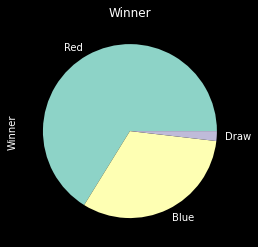

In [12]:
print(data['Winner'].value_counts())
data['Winner'].value_counts().plot(kind='pie', title='Winner')

In [13]:
data['country'] = data['location'].apply(lambda x : x.split(',')[-1])
data['country']

0        USA
1        USA
2        USA
3        USA
4        USA
        ... 
6007     USA
6008     USA
6009     USA
6010     USA
6011     USA
Name: country, Length: 6012, dtype: object

<AxesSubplot:title={'center':'countries'}>

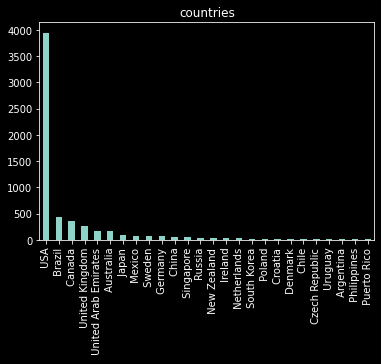

In [14]:
data['country'].value_counts().plot(kind='bar', title='countries')

In [15]:
data['fighters'] = pd.concat([data['R_fighter'], data['B_fighter']], ignore_index=True)


<AxesSubplot:title={'center':'fighters with the max of fights'}>

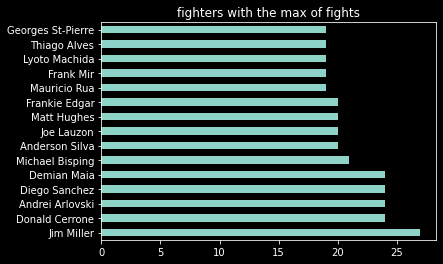

In [16]:
data['fighters'].value_counts().head(15).plot(kind='barh', title='fighters with the max of fights')


In [17]:
data['year'] = data['date'].apply(lambda x : x.split('-')[0])

<AxesSubplot:title={'center':'number of fights per year'}>

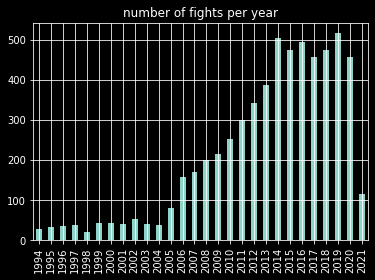

In [18]:
data['year'].value_counts().sort_index().plot(kind='bar',
                                                grid=True,
                                                title='number of fights per year')

<AxesSubplot:title={'center':'age of fighters'}>

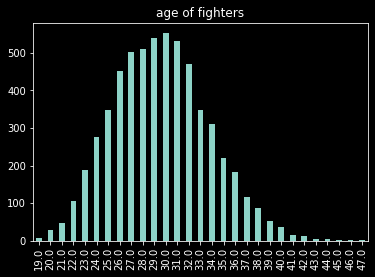

In [24]:
data['age'] = pd.concat([data['R_age'], data['B_age']], ignore_index=True)
#data['age'].astype(int)
data['age'].value_counts().sort_index().plot(kind='bar', title='age of fighters')

In [25]:
data['weight_class'].unique() 

array(['Bantamweight', 'Middleweight', 'Heavyweight', 'WomenStrawweight',
       'WomenBantamweight', 'Lightweight', 'Welterweight', 'Flyweight',
       'LightHeavyweight', 'Featherweight', 'WomenFlyweight',
       'WomenFeatherweight', 'CatchWeight', 'OpenWeight'], dtype=object)

<AxesSubplot:title={'center':'Women'}>

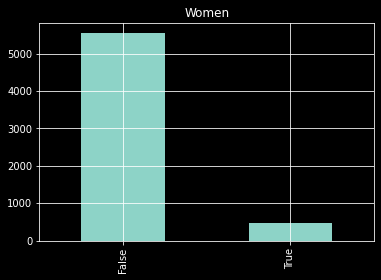

In [26]:
women = data['weight_class'].str.contains('Women')

women.value_counts().plot(kind='bar', title='Women', grid='True')

<AxesSubplot:title={'center':'The figher division'}, ylabel='weight_class'>

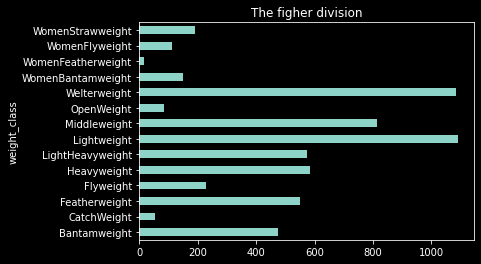

In [27]:
data['weight_class'].value_counts().sort_index().plot(kind='barh', 
                                                        title='The figher division', 
                                                        ylabel='weight_class')

Last fight recorded on this dataset was 20 March 2021

In [28]:
last_fight = data.loc[0, ['date']]
print(last_fight)

date    2021-03-20
Name: 0, dtype: object
